In [3]:
import numpy as np

In [17]:
def generate_lagrangian_basis(q,e):


    assert len(q.shape) == 1
    assert len(e.shape) == 1

    n_evaluation_points=e.shape[0]
    n_interpolation_points = q.shape[0]

    basis=np.ones((n_evaluation_points, n_interpolation_points), dtype=np.float64)

    for i in range(n_evaluation_points):
        for j in range(n_interpolation_points):
            for k in range(n_interpolation_points):
                if(j==k): continue
                basis[i,j]=basis[i,j]*(e[i]-q[k])/(q[j]-q[k])
                
    return basis

In [18]:
q=np.linspace(0,1,3)
e=np.linspace(0,1,5)
generate_lagrangian_basis(q,e)

array([[ 1.   ,  0.   , -0.   ],
       [ 0.375,  0.75 , -0.125],
       [-0.   ,  1.   ,  0.   ],
       [-0.125,  0.75 ,  0.375],
       [ 0.   , -0.   ,  1.   ]])

In [19]:
q

array([0. , 0.5, 1. ])

In [20]:
e

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [29]:
def interpolate_function(f,q,e):
    basis=generate_lagrangian_basis(q,e)
    n_eval_points=e.shape[0]
    n_interp_points=q.shape[0]
    y= np.zeros((n_eval_points),dtype=np.float64)
    for i in range(n_eval_points):
        for j in range(n_interp_points):
            y[i]=y[i]+f(q[j])*basis[i,j]
    return y

In [30]:
def sinus_f(x):
    return np.sin(2*np.pi*x)

In [31]:
interpolate_function(sinus_f,q,e)

array([ 0.00000000e+00,  5.00000000e-01,  8.66025404e-01,  1.00000000e+00,
        8.66025404e-01,  5.00000000e-01, -1.46028729e-17, -5.00000000e-01,
       -8.66025404e-01, -1.00000000e+00, -8.66025404e-01, -5.00000000e-01,
       -2.44929360e-16])

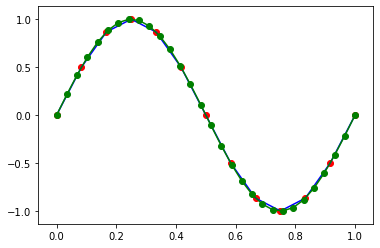

In [36]:
q=np.linspace(0,1,30)
e=np.linspace(0,1,13)
import matplotlib.pyplot as plt
plt.plot(e,sinus_f(e),color ='blue')
plt.plot(q,sinus_f(q),marker='o',color='green')
plt.scatter(e,interpolate_function(sinus_f,q,e),color='red')
plt.show()